In [ ]:
import gensim.downloader as api
wv=api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
wv.similarity(w1='fruit',w2='mango')


0.6631807

In [ ]:
wv.similarity(w1='page',w2='pages')

0.754366

In [ ]:
wv.most_similar('cat')

[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464985251426697),
 ('feline', 0.7326234579086304),
 ('beagle', 0.7150582671165466),
 ('puppy', 0.7075453400611877),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931973457336),
 ('chihuahua', 0.6709762215614319)]

In [ ]:
#king - man + woman= queen
#france - paris +berlin =germany
#India - Delhi + Washington= US
wv.most_similar(positive=['king','woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [ ]:
wv.most_similar(positive=['France','berlin'], negative=['paris'])

[('Germany', 0.608829915523529),
 ('Nazi_Occupied', 0.5052816271781921),
 ('Italy', 0.5008437037467957),
 ('Germnay', 0.49422886967658997),
 ('Belgium', 0.4884241223335266),
 ('extradites_Noriega', 0.48255041241645813),
 ('Switzerland', 0.48231467604637146),
 ('PARIS_AFX_Gaz_de', 0.4783669412136078),
 ('Austria', 0.47794008255004883),
 ('COLVILLE_SUR_MER', 0.46661776304244995)]

In [ ]:
wv.most_similar(positive=['tiger','cat'],negative=['cheetah'])

[('cats', 0.5911551713943481),
 ('dog', 0.5518790483474731),
 ('beagle', 0.5319520235061646),
 ('pet', 0.5163514614105225),
 ('kitten', 0.5161302089691162),
 ('feline', 0.5152533650398254),
 ('raccoon', 0.5038168430328369),
 ('rabbit', 0.4999296963214874),
 ('stray_cat', 0.4963075816631317),
 ('poodle', 0.48134708404541016)]

In [ ]:
#man -boy + woman =
wv.most_similar(positive=['man','woman'],negative=['boy'])

[('lady', 0.5354641675949097),
 ('person', 0.5296355485916138),
 ('Woman', 0.513024628162384),
 ('men', 0.4956326186656952),
 ('policewoman', 0.4909152090549469),
 ('WOMAN', 0.4802447557449341),
 ('motorist', 0.4788091480731964),
 ('women', 0.47408223152160645),
 ('teenage_girl', 0.47228237986564636),
 ('businesswoman', 0.4698699414730072)]

In [ ]:
wv.doesnt_match(['cat','dog','eagle','apple'])

'apple'

In [ ]:
wv.doesnt_match(['google','microsoft','amazon','umbrella'])

'umbrella'

In [ ]:
wv.doesnt_match(['son','mom','frog','sister'])

'frog'

In [ ]:
import pandas as pd
d=pd.read_csv('/content/Fake_Real_Data.csv',on_bad_lines='skip',engine='python')
df=pd.DataFrame(d)
df

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
1192,Donald Trump: ‘We Should Just Cancel The Elec...,Fake
1193,Richard Branson: Trump Came To Me Broke And V...,Fake
1194,Trump BUSTED Inviting Rich Friends To Sit In ...,Fake
1195,Illinois governor orders special session to br...,Real


In [ ]:
df['new_label']=df.label.map({
    'Fake':0,
    'Real':1,
})

In [ ]:
df

,Text,label,new_label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1
...,...,...,...
1192,Donald Trump: ‘We Should Just Cancel The Elec...,Fake,0
1193,Richard Branson: Trump Came To Me Broke And V...,Fake,0
1194,Trump BUSTED Inviting Rich Friends To Sit In ...,Fake,0
1195,Illinois governor orders special session to br...,Real,1


In [ ]:
!python -m spacy download en_core_web_lg

2023-08-20 17:14:38.123069: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
nlp=spacy.load('en_core_web_lg')
def preprocess(text):
  doc=nlp(text)
  filtered_tokens=[]
  for token in doc:
    if not token.is_stop and not token.is_punct:
      filtered_tokens.append(token.lemma_)
  return wv.get_mean_vector(filtered_tokens)

In [ ]:
df['vector']=df.Text.apply(lambda x: preprocess(x))

In [ ]:
df.Text[2]

'Trump proposes U.S. tax overhaul, stirs concerns on deficit WASHINGTON (Reuters) - President Donald Trump proposed on Wednesday the biggest U.S. tax overhaul in three decades, calling for tax cuts for most Americans, but prompting criticism that the plan favors business and the rich and could add trillions of dollars to the deficit. The proposal drew a swift, skeptical response from Senator Bob Corker, a leading Republican “fiscal hawk,” who vowed not to vote for any federal tax package financed with borrowed money. “What I can tell you is that I’m not about to vote for any bill that increases our deficit, period,” Corker, who said on Tuesday he would not seek re-election in 2018, told reporters. Trump said his tax plan was aimed at helping working people, creating jobs and making the tax code simpler and fairer. But it faces an uphill battle in the U.S. Congress with Trump’s own Republican Party divided over it and Democrats hostile. The plan would lower corporate and small-business 

In [ ]:
preprocess('do not worry if you do not want to come')

['worry', 'want', 'come']

In [ ]:
wv.get_mean_vector(['worry','want'])

array([ 0.0504289 ,  0.03978414,  0.02875209,  0.03127047, -0.08119703,
        0.02651687,  0.13651693, -0.02458679,  0.0006626 ,  0.01247795,
       -0.0272316 , -0.05709922,  0.00050097, -0.00889582, -0.06455964,
        0.09070876,  0.03134731,  0.11263628, -0.01064891, -0.06671901,
       -0.07361034,  0.00720509,  0.04446697,  0.04137821,  0.07363027,
        0.07818839,  0.02772873, -0.04287131,  0.01601155, -0.07020379,
        0.01331429,  0.02965906,  0.00380262, -0.09345877,  0.04281566,
        0.01651065,  0.06871605,  0.03050535,  0.00348155,  0.0337615 ,
        0.00304853, -0.0684739 ,  0.09437983, -0.00556765, -0.0954178 ,
       -0.05645206,  0.02359245,  0.01029087, -0.0062196 ,  0.00795996,
       -0.07734106,  0.05613635,  0.00415564,  0.0389045 ,  0.05069047,
        0.02675814, -0.043476  , -0.00866603,  0.05877605, -0.04583841,
        0.02087098,  0.0333943 , -0.06874312,  0.0101769 ,  0.02220195,
       -0.01792809, -0.07853757,  0.07571578, -0.05090012,  0.00

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.vector.values,df.new_label,test_size=0.2,random_state=2022)

In [ ]:
print('shape of x_train before reshapping:', x_train.shape)
print('shape of x_test before reshapping:',x_test.shape)

shape of x_train before reshapping: (957,)
shape of x_test before reshapping: (240,)


In [ ]:
df['vector'].values[:3]

array([array([ 8.65764171e-03,  1.90243423e-02, -1.19174421e-02,  3.23005319e-02,
              -2.40637269e-02, -9.65675246e-03,  1.52454339e-02, -1.99256353e-02,
               3.69987562e-02,  8.56092107e-03, -2.07264051e-02, -2.58618221e-02,
              -2.05285698e-02,  3.09266429e-02, -2.59609856e-02,  3.61854956e-02,
               2.85411440e-02,  4.34055775e-02,  5.54904481e-03, -3.60063091e-02,
              -1.04067186e-02,  9.32532363e-03,  5.35664037e-02,  4.00936184e-03,
               1.93928834e-02,  9.35758464e-03, -3.04607488e-02,  8.02151393e-03,
               2.91015320e-02, -7.78369047e-03, -1.03073912e-02,  1.91351455e-02,
              -3.68087403e-02, -1.16952462e-02,  9.93882399e-03, -1.79062271e-03,
               1.67817324e-02,  2.20200960e-02, -1.31025352e-03,  2.59642601e-02,
               3.18399705e-02, -2.76104957e-02,  4.86540236e-02,  4.34098486e-03,
              -3.15727144e-02, -1.31418034e-02, -5.79657499e-03, -1.59095309e-03,
               1

In [ ]:
import numpy as np
x_train_2d=np.stack(x_train)
x_test_2d=np.stack(x_test)
print('shape of x_train after reshaping:',x_train_2d.shape)
print('shape of x_test is after reshaping:',x_test_2d.shape)

shape of x_train after reshaping: (957, 300)
shape of x_test is after reshaping: (240, 300)


In [ ]:
wv.get_mean_vector(['worry','understand'])[:3]

array([ 0.00235079, -0.00284596, -0.03638233], dtype=float32)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
model=GradientBoostingClassifier()
model.fit(x_train_2d,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred=model.predict(x_test_2d)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       116
           1       0.99      0.97      0.98       124

    accuracy                           0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240



In [ ]:
text=[ 'Trump proposes U.S. tax overhaul, stirs concerns on deficit WASHINGTON (Reuters) - President Donald Trump proposed on Wednesday the biggest U.S. tax overhaul in three decades, calling for tax cuts for most Americans, but prompting criticism that the plan favors business and the rich and could add trillions of dollars to the deficit. The proposal drew a swift, skeptical response from Senator Bob Corker, a leading Republican “fiscal hawk,” who vowed not to vote for any federal tax package financed with borrowed money. “What I can tell you is that I’m not about to vote for any bill that increases our deficit, period,” Corker, who said on Tuesday he would not seek re-election in 2018, told reporters. Trump said his tax plan was aimed at helping working people, creating jobs and making the tax code simpler and fairer. But it faces an uphill battle in the U.S. Congress with Trump’s own Republican Party divided over it and Democrats hostile. The plan would lower corporate and small-business income tax rates, reduce the top income tax rate for high-earning American individuals and scrap some popular tax breaks, including one that benefits people in high-tax states dominated by Democrats. Forged during months of talks among Trump’s aides and top congressional Republicans, the plan contained few details on how to pay for the tax cuts without expanding the budget deficit and adding to the nation’s $20 trillion national debt. The plan still must be turned into legislation, which was not expected until after Congress makes progress on the fiscal 2018 budget, perhaps in October. It must then be debated by the Republican-led congressional tax-writing committees. Analysts were skeptical that Congress could approve a tax bill this year, but that is what Republicans hope to achieve so they can enter next year’s congressional election campaigns with at least one legislative achievement to show for 2017. Financial markets rallied on the plan’s unveiling, an event long anticipated by traders betting that stocks would benefit from both faster economic growth and inflation. At an event in Indianapolis, Trump called the plan the largest tax cut in U.S. history. “We want tax reform that is pro-growth, pro-jobs, pro-worker, pro-family and, yes, tax reform that is pro-American,” he said. The real estate mogul-turned-politician, who promised big tax cuts as a candidate, told reporters he personally would not gain financially from the proposal. “I think there’s very little benefit for people of wealth,” said Trump, who unlike many of his White House predecessors, has refused to make public his own tax returns. Republicans have produced no major legislative successes since Trump took office in January, even though they control the White House and both chambers of Congress. Their top legislative priority, overhauling the U.S. healthcare system, collapsed again in the Senate on Tuesday. A comprehensive rewrite of the U.S. tax code has eluded previous presidents and Congress for decades. The last one was passed in 1986 under Republican President Ronald Reagan. Trump’s plan falls short of the sweeping, bipartisan package crafted by Reagan and congressional Democrats, analysts said. The White House said that, under the proposal, typical middle-class families would have less income subject to federal tax. Trump said the first $12,000 earned by an individual and the first $24,000 by a married couple would be tax-free. The plan would lower the top individual tax rate, paid by the nation’s top earners, to 35 percent from 39.6 percent. It would lower the top corporate income tax rate to 20 percent from the current 35 percent. The existing rate is high globally, but many U.S.-based multinationals pay much less than the headline rate because of abundant loopholes and tax breaks. Trump has appealed to Democrats to back the plan, although they were not consulted in drafting it. Republicans hold a thin 52-48 Senate majority and may need some Democratic support to win passage. But Democrats said the plan would expand the federal deficit in order to deliver tax cuts to wealthy Americans rather than the middle-class families that Trump and Republicans say they are trying to help.  “If this framework is all about the middle class, then Trump Tower is middle-class housing,” said Senator Ron Wyden, the top Democrat on the tax law-writing Senate Finance Committee.      Republican Kevin Brady, chairman of the tax-writing House of Representatives Ways and Means Committee, said he expected tax legislation to be passed by the end of this year. The Committee for a Responsible Federal Budget, a Washington-based policy group, estimated on Wednesday the plan contained about $5.8 trillion of total tax cuts over a decade and would have a net cost of $2.2 trillion through 2027. Analysts have warned huge tax cuts would balloon the deficit if economic growth projected by Republicans to offset the costs fails to materialize amid rising interest rates. ‘PASS-THROUGH’ RATE The plan would set a new 25 percent tax rate for “pass-through” businesses, which are usually small, private enterprises, such as partnerships and sole proprietorships. They represent about 95 percent of all U.S. businesses. Under current law, the profits of those companies “pass through” directly to their owners and are taxed as personal income, often at the top 39.6 percent individual income rate. Cutting that to 25 percent could mean big tax savings for small-business owners, but also be vulnerable to abuse by other individuals and companies, analysts said. Republicans proposed eliminating some tax deductions. They did not target the popular ones for mortgage interest and charitable giving, but called for scrapping the one for state and local tax payments. That could especially hurt people in high-tax states like California and New York. In a step to simplify tax returns, the plan would shrink the current seven tax brackets to three: 12 percent, 25 percent and 35 percent. That would raise the bottom tax rate on low-earning Americans to 12 percent from 10 percent, but analysts said other parts of the plan would still mean a net tax cut.',
      'Democrats say Trump agrees to work on immigration bill, wall in dispute WASHINGTON (Reuters) - President Donald Trump and Democratic leaders in the U.S. Congress have agreed to work together on legislation to protect “Dreamers,” the illegal immigrants who were children when they entered the United States, the lawmakers said on Wednesday, although a dispute erupted over exactly what had been agreed. Following a dinner with Trump at the White House, Senate Democratic leader Chuck Schumer and House of Representatives Democratic leader Nancy Pelosi said the “productive meeting” focused on “DACA,” a program established by former President Barack Obama. “We agreed to enshrine the protections of DACA (Deferred Action for Childhood Arrivals) into law quickly, and to work out a package of border security, excluding the wall, that’s acceptable to both sides,” Schumer and Pelosi said in a statement. All year, Democrats have insisted that they will block any legislation that contains funding for a wall along the length of the U.S. border with Mexico, a top Trump campaign goal that many Republicans in Congress also do not support. While White House officials have suggested legislation on DACA could move forward without wall funding, White House spokeswoman Sarah Sanders disputed the characterization that a deal had been reached to leave it out of any legislation focused on the Dreamers. “While DACA and border security were both discussed, excluding the wall was certainly not agreed to,” she said on Twitter. Throughout his 2016 campaign for president and since taking office in January, Trump has demanded the construction of a wall to keep out illegal immigrants and drugs. He initially said Mexico would pay for the wall but has requested money from the U.S. Congress after the government of Mexico refused to pay. The dinner was the latest effort in a new initiative by Trump to work with opposition party Democrats on major legislation. Following the dinner, a White House official said the president, Schumer and Pelosi discussed tax reform, immigration, border security, infrastructure investments and trade as part of Trump’s bid to reach out to Democrats. “The administration looks forward to continuing these conversations with leadership on both sides of the aisle,” the official said. Over a dinner of Chinese food, Trump and the Democratic leaders also discussed issues related to U.S.-China trade, according to a congressional aide briefed on the meeting. Schumer and Pelosi also said that they urged Trump to make permanent government subsidy payments under the Affordable Care Act, also known as “Obamacare.” “Those discussions will continue,” the lawmakers said. Trump and most Republicans in Congress have demanded the repeal of Obamacare but have been unable to agree on a replacement for the healthcare program that became law in 2010. Using his executive powers, Trump canceled Obama’s DACA program in which about 800,000 undocumented young people have escaped the threat of deportation and been able to apply for work permits in the United States. Trump argued that Obama over-stepped his authority in creating the program. But Trump gave Congress six months to come up with a replacement program in the form of legislation to be enacted into law. Democratic Representative Henry Cuellar, who attended a White House meeting with Trump earlier on Wednesday, told reporters the president said he would not insist on wall funding as part of a Dreamers bill, but would pursue it on other, future legislation. Cuellar said Trump urged lawmakers to link a Republican bill to cut legal immigration to the United States with protections for Dreamers. But many Democrats oppose lowering the cap on annual legal immigration. ',
       "Trump says he has 'great heart' for immigrant 'Dreamers' WASHINGTON (Reuters) - U.S. President Donald Trump said on Tuesday he has “great heart” for illegal immigrants brought to the United States as children and he wants Congress to produce a legislative solution for them. “I have a great heart for the folks we’re talking about, a great love for them,” Trump said after his administration announced earlier Tuesday it was phasing out a program that protects the so-called Dreamers from deportation. “I can tell you in speaking to members of Congress they want to be able to do something and do it right and really we have no choice,” Trump told reporters. "   ,
       'U.S. conservative leader optimistic of common ground on healthcare WASHINGTON (Reuters) - Republicans in the U.S. House of Representatives could achieve common ground on a deal to win support for healthcare legislation on Thursday, after President Donald Trump intervened in negotiations, a conservative leader said on Wednesday. “We’re not there yet, but we’re very optimistic that if we work around the clock between now and Noon tomorrow, that we’re going to be able to hopefully find some common ground,” Representative Mark Meadows, chairman of the conservative House Freedom Caucus, told reporters. Meadows’ group has opposed House Republican healthcare legislation up to now and threatened earlier in the day to block its passage in a Thursday vote.  ',
       ' Top Trump Surrogate BRUTALLY Stabs Him In The Back: ‘He’s Pathetic’ (VIDEO) It s looking as though Republican presidential candidate Donald Trump is losing support even from within his own ranks. You know things are getting bad when even your top surrogates start turning against you, which is exactly what just happened on Fox News when Newt Gingrich called Trump  pathetic. Gingrich knows that Trump needs to keep his focus on Hillary Clinton if he even remotely wants to have a chance at defeating her. However, Trump has hurt feelings because many Republicans don t support his sexual assault against women have turned against him, including House Speaker Paul Ryan (R-WI). So, that has made Trump lash out as his own party.Gingrich said on Fox News: Look, first of all, let me just say about Trump, who I admire and I ve tried to help as much as I can. There s a big Trump and a little Trump. The little Trump is frankly pathetic. I mean, he s mad over not getting a phone call? Trump s referring to the fact that Paul Ryan didn t call to congratulate him after the debate. Probably because he didn t win despite what Trump s ego tells him.Gingrich also added: Donald Trump has one opponent. Her name is Hillary Clinton. Her name is not Paul Ryan. It s not anybody else. Trump doesn t seem to realize that the person he should be mad at is himself because he truly is his own worst enemy. This will ultimately lead to his defeat and he will have no one to blame but himself.Watch here via Politico:Featured Photo by Joe Raedle/Getty Images'
]
text_news_vectors=[preprocess(n) for n in text]
model.predict(text_news_vectors)

array([1, 1, 1, 1, 0])

In [ ]:
df.Text[0]

' Top Trump Surrogate BRUTALLY Stabs Him In The Back: ‘He’s Pathetic’ (VIDEO) It s looking as though Republican presidential candidate Donald Trump is losing support even from within his own ranks. You know things are getting bad when even your top surrogates start turning against you, which is exactly what just happened on Fox News when Newt Gingrich called Trump  pathetic. Gingrich knows that Trump needs to keep his focus on Hillary Clinton if he even remotely wants to have a chance at defeating her. However, Trump has hurt feelings because many Republicans don t support his sexual assault against women have turned against him, including House Speaker Paul Ryan (R-WI). So, that has made Trump lash out as his own party.Gingrich said on Fox News: Look, first of all, let me just say about Trump, who I admire and I ve tried to help as much as I can. There s a big Trump and a little Trump. The little Trump is frankly pathetic. I mean, he s mad over not getting a phone call? Trump s referr

In [ ]:
df.Text[9]

"Trump says he has 'great heart' for immigrant 'Dreamers' WASHINGTON (Reuters) - U.S. President Donald Trump said on Tuesday he has “great heart” for illegal immigrants brought to the United States as children and he wants Congress to produce a legislative solution for them. “I have a great heart for the folks we’re talking about, a great love for them,” Trump said after his administration announced earlier Tuesday it was phasing out a program that protects the so-called Dreamers from deportation. “I can tell you in speaking to members of Congress they want to be able to do something and do it right and really we have no choice,” Trump told reporters. "

In [ ]:
y_test.shape

(240,)

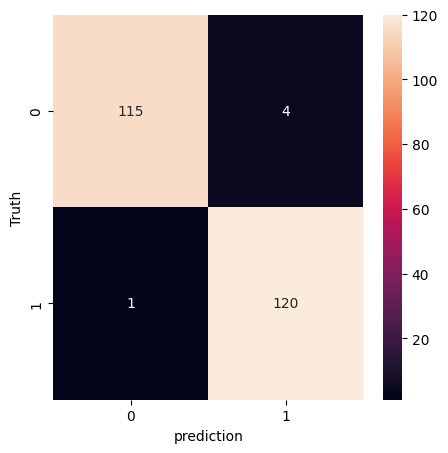

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('prediction')
plt.ylabel('Truth')
plt.show()

In [ ]:
import gensim.downloader as api
mv=api.load('word2vec-google-news-')

In [ ]:
import pandas as pd
d=pd.read_csv('/content/mbti_1.csv',on_bad_lines='skip',engine='python')
df=pd.DataFrame(d)
df

,type,posts
0,INFJ,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...
1,ENTP,I'm finding the lack of me in these posts very...
2,INTP,Good one _____ https://www.youtube.com/watc...
3,INTJ,"Dear INTP, I enjoyed our conversation the ot..."
4,ENTJ,You're fired.|||That's another silly misconcep...
...,...,...
3336,ISTP,There's no conspiracy. People don't tell you b...
3337,INTJ,"Marie Claire, Do you mind if I ask what you me..."
3338,INFP,I get typed as both a 4w5 and 5w6 as well but ...
3339,ISFJ,"Always talk to strangers, no matter how creepy..."


In [ ]:
df['type'].value_counts

<bound method IndexOpsMixin.value_counts of 0       INFJ
1       ENTP
2       INTP
3       INTJ
4       ENTJ
        ... 
3336    ISTP
3337    INTJ
3338    INFP
3339    ISFJ
3340    INFP
Name: type, Length: 3341, dtype: object>

In [ ]:
df_list=[]
df_list.append(df.groupby('type')['type'].agg('count'))

In [ ]:
print(df_list)

[type
ENFJ     79
ENFP    241
ENTJ     77
ENTP    281
ESFJ     12
ESFP     24
ESTJ     16
ESTP     44
INFJ    569
INFP    710
INTJ    428
INTP    485
ISFJ     64
ISFP     97
ISTJ     74
ISTP    140
Name: type, dtype: int64]


In [ ]:
df['new_type']=df['type'].map({
    'ENFJ': 0,
    'ENFP':1,
    'ENTJ':2,
    'ENTP':3,
    'ESFJ':4,
    'ESFP':5,
    'ESTP':6,
    'INFJ':7,
    'INFP':8,
    'INTJ':9,
    'INTP':10,
    'ISFJ':11,
    'ISFP':12,
    'ISTJ':13,
    'ISTP':14,
    'ESTJ':15

})

In [ ]:
df

,type,posts,new_type
0,INFJ,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...,7
1,ENTP,I'm finding the lack of me in these posts very...,3
2,INTP,Good one _____ https://www.youtube.com/watc...,10
3,INTJ,"Dear INTP, I enjoyed our conversation the ot...",9
4,ENTJ,You're fired.|||That's another silly misconcep...,2
...,...,...,...
3336,ISTP,There's no conspiracy. People don't tell you b...,14
3337,INTJ,"Marie Claire, Do you mind if I ask what you me...",9
3338,INFP,I get typed as both a 4w5 and 5w6 as well but ...,8
3339,ISFJ,"Always talk to strangers, no matter how creepy...",11


In [ ]:
import gensim.downloader as api

In [ ]:
mv=api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
!python -m spacy download en_core_web_lg

2023-08-21 17:00:26.278975: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 17:00:27.963308: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
nlp=spacy.load('en_core_web_lg')

In [ ]:
def preprocess(text):
  doc=nlp(text)
  filtered_tokens=[]
  for token in doc:
    if not token.is_stop and not token.is_punct:
      filtered_tokens.append(token.lemma_)
  return mv.get_mean_vector(filtered_tokens)


In [ ]:
df['vector']=df.posts.apply(lambda x: preprocess(x))

In [ ]:
df['vector']

0       [0.009164877, 0.014793137, 0.000253428, 0.0458...
1       [0.01883827, 0.007221167, 0.00089683017, 0.037...
2       [0.022305923, 0.010939572, -0.00043027796, 0.0...
3       [0.01766172, 0.008390619, -0.00049512193, 0.04...
4       [0.018471768, 0.011556651, 0.0026981656, 0.045...
                              ...                        
3336    [0.015290176, 0.008463632, -0.0029410252, 0.03...
3337    [0.02220318, 0.008893155, -0.0031635445, 0.040...
3338    [0.025242312, 0.011381488, -0.0020128472, 0.04...
3339    [0.0059296433, 0.015585816, 0.0033892216, 0.03...
3340    [0.019004328, 0.0046783844, 0.00047370995, 0.0...
Name: vector, Length: 3341, dtype: object

In [ ]:
df

,type,posts,new_type,vector
0,INFJ,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...,7,"[0.009164877, 0.014793137, 0.000253428, 0.0458..."
1,ENTP,I'm finding the lack of me in these posts very...,3,"[0.01883827, 0.007221167, 0.00089683017, 0.037..."
2,INTP,Good one _____ https://www.youtube.com/watc...,10,"[0.022305923, 0.010939572, -0.00043027796, 0.0..."
3,INTJ,"Dear INTP, I enjoyed our conversation the ot...",9,"[0.01766172, 0.008390619, -0.00049512193, 0.04..."
4,ENTJ,You're fired.|||That's another silly misconcep...,2,"[0.018471768, 0.011556651, 0.0026981656, 0.045..."
...,...,...,...,...
3336,ISTP,There's no conspiracy. People don't tell you b...,14,"[0.015290176, 0.008463632, -0.0029410252, 0.03..."
3337,INTJ,"Marie Claire, Do you mind if I ask what you me...",9,"[0.02220318, 0.008893155, -0.0031635445, 0.040..."
3338,INFP,I get typed as both a 4w5 and 5w6 as well but ...,8,"[0.025242312, 0.011381488, -0.0020128472, 0.04..."
3339,ISFJ,"Always talk to strangers, no matter how creepy...",11,"[0.0059296433, 0.015585816, 0.0033892216, 0.03..."


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['new_type'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['new_type'], **{})
chart

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.vector.values,df.new_type,test_size=0.2,random_state=2022)

In [ ]:
x_train.shape

(2672,)

In [ ]:
y_train.shape

(2672,)

In [ ]:
print(x_test.shape)
print(y_test.shape)

(669,)
(669,)


In [ ]:
df['vector'].values

array([array([ 9.16487724e-03,  1.47931371e-02,  2.53428007e-04,  4.58650887e-02,
              -2.15201285e-02,  6.36710227e-03,  2.63603516e-02, -3.50506715e-02,
               2.84456536e-02,  1.34615712e-02, -1.14803808e-02, -3.99051830e-02,
              -2.00594333e-03,  5.54288365e-03, -3.86951268e-02,  2.66117360e-02,
               1.11834398e-02,  4.40511517e-02,  6.34340290e-03, -3.77794653e-02,
              -4.85706842e-03,  2.24962458e-02,  4.78705298e-03,  4.76435525e-03,
               3.16109322e-03, -7.12542981e-03, -3.14272046e-02,  2.61752661e-02,
               1.42328143e-02, -8.28988850e-03, -1.44554200e-02,  2.36438960e-03,
              -1.51497666e-02, -1.13870539e-02, -1.11473436e-02, -6.89814985e-03,
               1.07991062e-02,  1.79832941e-03,  4.75693727e-03,  3.07931080e-02,
               2.88021490e-02, -1.31569505e-02,  4.51634079e-02,  2.53017130e-03,
              -5.67420898e-03, -1.71673484e-02, -8.99873767e-03,  2.75732391e-03,
              -4

In [ ]:
import numpy as np

x_train_2d=np.stack(x_train)
x_test_2d=np.stack(x_test)
print('shape after reshaping:',x_train_2d)
print('shape after reshapping:',x_test_2d)

shape after reshaping: [[ 0.02019185  0.00445076  0.00135339 ... -0.01130979  0.01081166
  -0.00555087]
 [ 0.01695683  0.00652361 -0.00073929 ... -0.01679319  0.01448894
  -0.00260649]
 [ 0.01598035  0.00145749  0.00573545 ... -0.01800843  0.00402514
  -0.00390341]
 ...
 [ 0.01801559  0.00742477  0.00418766 ... -0.02317777  0.00221096
  -0.00218105]
 [ 0.0241717   0.01354914  0.00372463 ... -0.01691915  0.00266469
  -0.00543485]
 [ 0.02163362  0.00767149 -0.00156138 ... -0.01492131  0.00727389
  -0.0030872 ]]
shape after reshapping: [[ 0.01991817  0.00570028  0.00492977 ... -0.01835751  0.00439535
  -0.00281006]
 [ 0.01599432  0.00996788 -0.00407509 ... -0.0124665   0.00938926
   0.00055318]
 [ 0.01671219  0.00756726  0.0031968  ... -0.01780006  0.00226195
  -0.0008964 ]
 ...
 [ 0.0161496   0.02150001  0.0008112  ... -0.01376839  0.00291682
  -0.01753375]
 [ 0.02767751  0.00481776  0.00268867 ... -0.01433663  0.00730818
   0.00566622]
 [ 0.01787176  0.00455708  0.00261362 ... -0.016727

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.pipeline import Pipeline
pipe_line=Pipeline({
    'Gradientboosting':GradientBoostingClassifier(),
    'kneighbors':KNeighborsClassifier()
})

In [ ]:
pipe_line

Pipeline(steps={'Gradientboosting': GradientBoostingClassifier(),
                'kneighbors': KNeighborsClassifier()})

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
gb=GradientBoostingClassifier()
gb.fit(x_train_2d,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred=gb.predict(x_test_2d)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.07      0.11        15
           1       0.43      0.20      0.27        45
           2       0.00      0.00      0.00        19
           3       0.24      0.17      0.20        54
           4       0.00      0.00      0.00         2
           5       0.17      0.20      0.18         5
           6       0.00      0.00      0.00         7
           7       0.24      0.28      0.26       112
           8       0.29      0.49      0.36       138
           9       0.33      0.34      0.34        82
          10       0.36      0.41      0.38       103
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00        18
          13       0.14      0.05      0.07        20
          14       0.44      0.12      0.19        34
          15       0.00      0.00      0.00         2

    accuracy                           0.29       669
   macro avg       0.18   

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train_2d,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=model.predict(x_test_2d)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.38      0.14      0.21       118
           2       0.05      0.08      0.06        12
           3       0.19      0.16      0.17        63
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.26      0.21      0.23       135
           8       0.39      0.34      0.36       159
           9       0.17      0.27      0.21        52
          10       0.30      0.32      0.31        97
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.10      1.00      0.18         2
          14       0.09      0.43      0.15         7
          15       0.00      0.00      0.00         0

    accuracy                           0.24       669
   macro avg       0.12   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
text={
    "One time my parents were fighting over my dad's affair and my dad pushed my mom. The fall broke her finger.  She's pointed a gun at him and made him get on his knees and beg for his life. She's...|||I'm gonna talk about what a piece of shit my dad is now.  He's an alcoholic and he has some kind of serious mental problem when it comes to complying with the IRS. (In his words, Laws don't apply...." ,
    "some of these both excite and calm me:  BUTTS  bodies  brains  community gardens  camping  camping with dogs  hiking with dogs  chillin with animals",
    "Now I'm interested. But too lazy to go research it, because it's time-consuming "
}
mv_predict=[preprocess(n) for n in text]
gb.predict(mv_predict)

array([ 4,  6, 15])

In [ ]:
df.groupby(['type'])['type'].agg('count')

type
ENFJ     79
ENFP    241
ENTJ     77
ENTP    281
ESFJ     12
ESFP     24
ESTJ     16
ESTP     44
INFJ    569
INFP    710
INTJ    428
INTP    485
ISFJ     64
ISFP     97
ISTJ     74
ISTP    140
Name: type, dtype: int64

In [ ]:
df['new_type'][15]

10

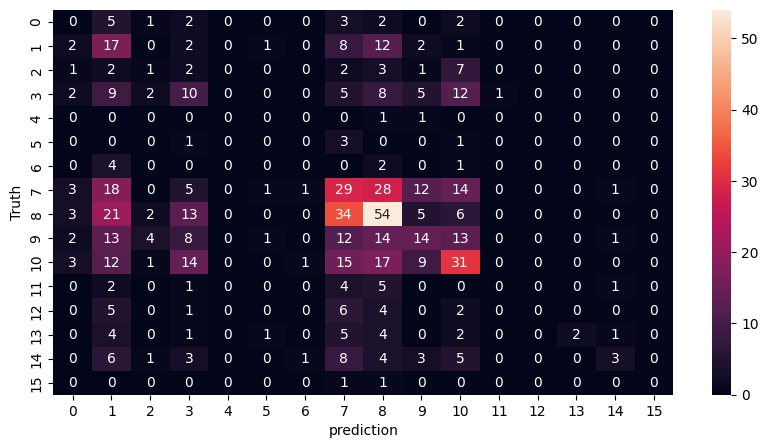

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('prediction')
plt.ylabel('Truth')
plt.show()